# Dataset Description

# Data Dictionary

Survival -> 0 = No, 1 = Yes
pclass (Ticket class) ->	1 = 1st, 2 = 2nd, 3 = 3rd
sex	-> Male, Female	
sibsp	// of siblings / spouses aboard the Titanic	
parch	// of parents / children aboard the Titanic	
ticket    // Ticket number	
fare	   // Passenger fare	
cabin	Cabin number	
embarked	(Port of Embarkation) ->	C = Cherbourg, Q = Queenstown, S = Southampton

#  Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# From: https://www.kaggle.com/competitions/titanic/data

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Load the data

In [2]:
raw_data = pd.read_csv('./train.csv')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

### Explore the descriptive statistics of the attributes

In [3]:
raw_data.describe(include='all')
# The categorical variables don't have some types of numerical descriptives and numerical variables 
# don't have some types of categorical descriptives so the value displayed is NaN.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### From the descriptive statistics I observed that:
##### >> there are missing values for the attributes Age, Cabin and Embarked
##### >> there are no duplicate tuples, as there 891 unique names for 891 observations

In [4]:
# with this line I can confirm that there are no duplicate tuples
raw_data.duplicated().any()

False

In [5]:
# I'll also drop the attribute Name, because I believe that in this case the name has no use as a predictor
raw_data = raw_data.drop(['Name'], axis=1)

In [6]:
raw_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# From the data types of the attributes we can se that except the ticket number which seems to be an object
# instead of number as it was described in the dataset description, all other attributes data type is correct
raw_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [8]:
# From the data above, we can see that some ticket numbers have preffixes, which may reffer 
# to specific agencies

# I'll extract the number and the string preffix, if it exist, from each ticket value and save them
# into new attributes called ticket_agency (for the preffix) and ticket_number for the number itself...

# raw_data['Ticket'] = raw_data['Ticket'].apply()
# raw_data['Ticket']

In [9]:
# Although the Ticket attribute I may lose some explanatory power if I drop the column refering to this
# attribute, I'll still drop it for this model in specific because I believe that it's o no use
raw_data = raw_data.drop(['Ticket'], axis=1)

### Dealing with the missing values

In [10]:
raw_data.isnull().sum() # To get the total number of missing values for each attribute

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Get the percentage of missing values for each attribute with missing values
raw_data_mv = raw_data.isnull().sum()/len(raw_data)*100 
raw_data_mv = raw_data_mv.drop(raw_data_mv[raw_data_mv == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :raw_data_mv})
missing_data

,Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


#### Plot the missing values

Text(0.5, 1.0, 'Attributes wiht Missing Values')

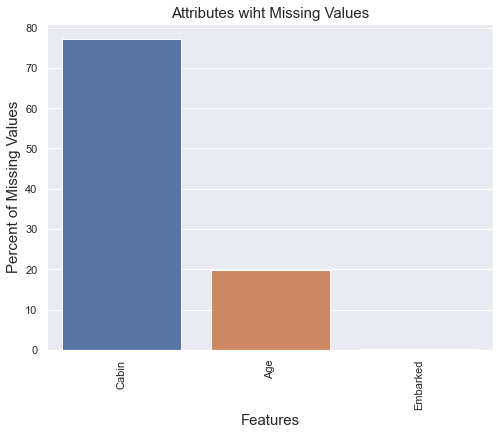

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=raw_data_mv.index, y=raw_data_mv)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Attributes wiht Missing Values', fontsize=15)

In [13]:
# For the embarked attribute, I'll simply drop the missing values as there a less than 5% observations
# with missing values
raw_data = raw_data[raw_data['Embarked'].notna()]
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# For the attributes Age and Cabin, dropping the rows with missing values would cost a lot of data as 
# the rows with missing values for these are more than 5% of the observations. So the missing values 
# must be dealt in another way

# For the attribute Cabin, althought I think that it's very significant, to avoid errors due to wrong
# treatment to fill the missing values I'll drop the attribute... Also the attribute Pclass will
# help to cover a good amount of explanatory power lost due to the loss of the cabin attribute. 
# when I try to improve the model, I'll deal with the attribute cabin with a better method

raw_data = raw_data.drop(['Cabin'], axis=1)
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [15]:
# For the age attribute, I observed that there are althougt there are a lot of missing values, they don't 
# exceed 60% and the values are numerical, so I decided to fill the missing values

# I'll fill the missing values with the mean instead of the median since, from my observation of the 
# descriptive statistics, there are no obvious outliers.

raw_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [16]:
raw_data['Age'] = raw_data['Age'].replace(np.NaN, raw_data['Age'].mean())
raw_data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.642093
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

In [17]:
raw_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
# I'll create another variable for the data with no missing values 
data_no_mv = raw_data.copy()
data_no_mv.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.382452,2.311586,NaN,29.642093,0.524184,0.382452,32.096681,NaN
std,256.998173,0.486260,0.834700,NaN,12.968346,1.103705,0.806761,49.697504,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,224.000000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,446.000000,0.000000,3.000000,NaN,29.642093,0.000000,0.000000,14.454200,NaN
75%,668.000000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


### Creating Dummies for categorical values

In [19]:
data_no_mv['Sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
data_with_dummies = data_no_mv.copy()
data_with_dummies['Sex'] = data_with_dummies['Sex'].map({'male':1, 'female':0})
data_with_dummies['Sex'].unique()

array([1, 0], dtype=int64)

In [21]:
data_with_dummies['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
data_with_dummies['Embarked'] = data_with_dummies['Embarked'].map({'S':0, 'C':1, 'Q':2})
data_with_dummies['Embarked'].unique()

array([0, 1, 2], dtype=int64)

### PDF plot
#### To see if the data is normaly distributed and whether there are any obvious outliers

C:\Users\Munguambe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

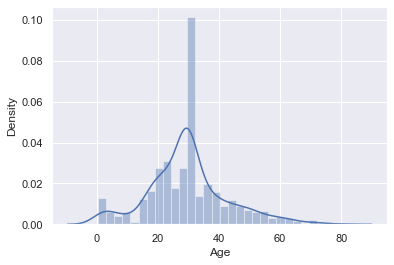

In [23]:
# Plot the Age attribute to see if there are any observable anomaly in the distribution
sns.distplot(data_with_dummies['Age'])

#### For better analyses, I'll verify the skewness of all variables, and apply a log transformation for those that are above the treshold, that is, above 0.75

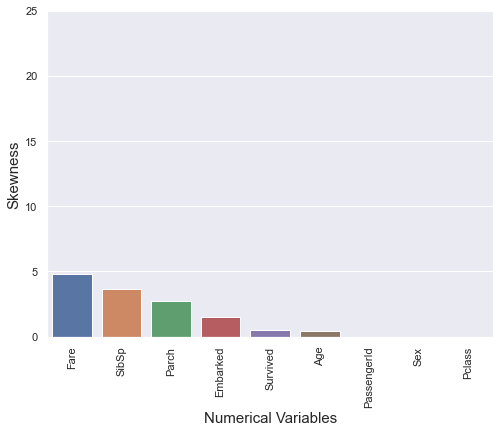

In [24]:
numerical_attributes = data_with_dummies.dtypes[data_with_dummies.dtypes != "object"].index
# in this case, since I have already created the dummies, all attributes are numerical

skewed_attributes = data_with_dummies[numerical_attributes].skew()
skewness = pd.DataFrame({"Variable":skewed_attributes.index, "Skewness":skewed_attributes.values})
skewness = skewness.sort_values('Skewness', ascending=[0])

fig, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=skewness['Variable'], y=skewness['Skewness'])
plt.ylim(0,25)
plt.xlabel('Numerical Variables', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('', fontsize=15)
plt.show() # display the skewness of the attributes without the log transformation

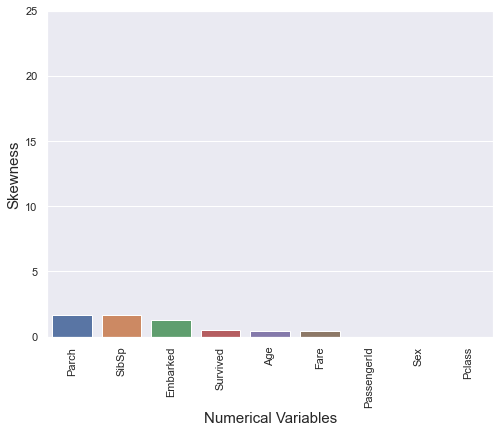

In [25]:
# Select the attributes with the skewness above the treshold, .75
skewed_attributes = skewed_attributes[skewed_attributes > 0.75]
data_with_dummies[skewed_attributes.index] = np.log1p(data_with_dummies[skewed_attributes.index])

skewed_attributes = data_with_dummies[numerical_attributes].skew()
skewness_new = pd.DataFrame({"Variable":skewed_attributes.index, "Skewness":skewed_attributes.values})
# select the variables with a skewness above a certain threshold

skewness_new = skewness_new.sort_values('Skewness', ascending=[0])

fig, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=skewness_new['Variable'], y=skewness_new['Skewness'])
plt.ylim(0,25)
plt.xlabel('Numerical Variables', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('', fontsize=15)
plt.show() # display the plot of the skewness of the attributes after the log transformation

### Correlation analysis

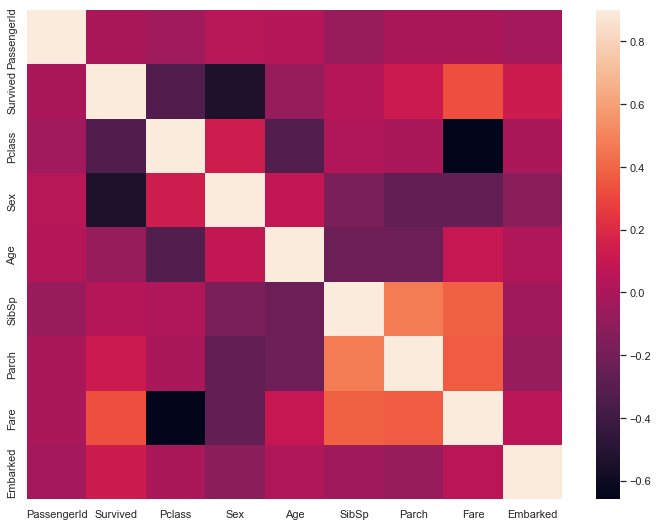

In [26]:
corrmat = data_with_dummies.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9);

#### From the heatmap, it can be seen that wether a passenger survived or not has a lot to do with ther sex and their pclass (proxy for socio-economic status). Of course, other attributes are also correlated althought not so much.

C:\Users\Munguambe\anaconda3\lib\site-packages\seaborn\matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 576x432 with 0 Axes>

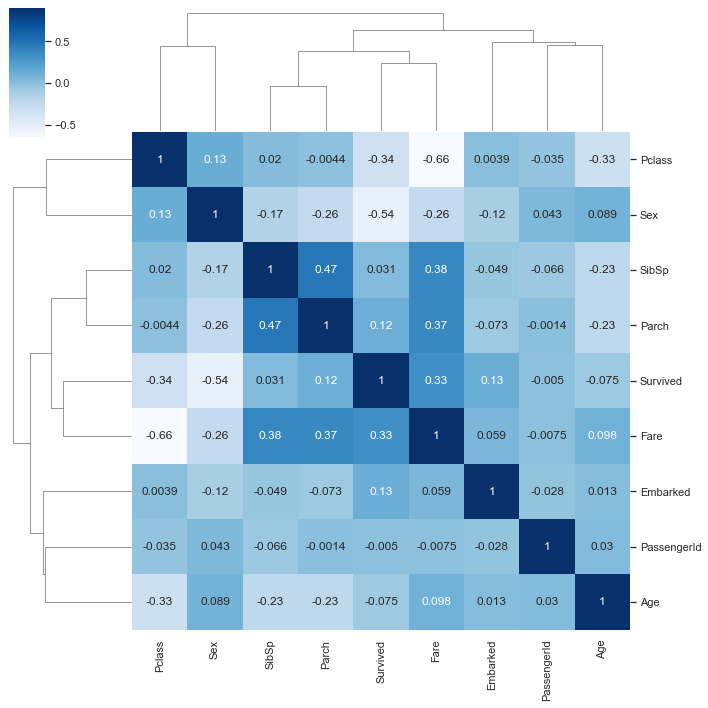

In [27]:
plt.figure(figsize=(8,6))
sns.clustermap(corrmat, vmax=0.9, square=True, annot=True, cmap="Blues");

#### with the clustermap, it can be seen that the correlation between the attribute survived and the attributes age and pclass is inverse, which means that the lower the age and the pclass, the higher the chance of survivel

In [28]:
# get the summary to see if all data is numerical
data_with_dummies.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.642093,0.282473,0.218171,2.959024,0.226144
std,256.998173,0.486260,0.834700,0.477538,12.968346,0.463165,0.412014,0.967750,0.379940
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,2.185579,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.642093,0.000000,0.000000,2.737881,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,0.693147,0.000000,3.465736,0.693147
max,891.000000,1.000000,3.000000,1.000000,80.000000,2.197225,1.945910,6.240917,1.098612


In [29]:
# Store the data in the variable data_cleaned
data_cleaned = data_with_dummies.copy()
data_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,0.693147,0.0,2.110213,0.000000
1,2,1,1,0,38.0,0.693147,0.0,4.280593,0.693147
2,3,1,3,0,26.0,0.000000,0.0,2.188856,0.000000
3,4,1,1,0,35.0,0.693147,0.0,3.990834,0.000000
4,5,0,3,1,35.0,0.000000,0.0,2.202765,0.000000


In [30]:
data_cleaned.to_csv('./train_cleaned.csv')

# Declare the targets and inputs

In [31]:
targets = data_cleaned['Survived']
targets.shape

(889,)

In [32]:
inputs = data_cleaned.drop(['Survived'], axis=1)
inputs.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Feature Selection with f_regression

In [33]:
# I'll be using f_regression for feature selection because I want to test the explanatore power of each
# attribute in relation to the target...

from sklearn.feature_selection import f_regression
f_regression(inputs, targets)
# this will return the f-statistics and the respective p-values
# If an attribte p-value is higher than 0.05, I'll disregard it

(array([2.24274791e-02, 1.12541402e+02, 3.68154732e+02, 4.95231518e+00,
        8.66268211e-01, 1.22583535e+01, 1.06232759e+02, 1.41141897e+01]),
 array([8.80989537e-01, 7.77691629e-25, 6.68201214e-69, 2.63064961e-02,
        3.52243742e-01, 4.86276759e-04, 1.32207458e-23, 1.83278746e-04]))

In [34]:
p_values = f_regression(inputs, targets)[1]
p_values.round(3)

array([0.881, 0.   , 0.   , 0.026, 0.352, 0.   , 0.   , 0.   ])

In [35]:
inputs.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [36]:
f_reg_summary = pd.DataFrame(data=inputs.columns, columns=['Features'])
f_reg_summary['p-values'] = p_values.round(3)
f_reg_summary

,Features,p-values
0,PassengerId,0.881
1,Pclass,0.000
2,Sex,0.000
3,Age,0.026
4,SibSp,0.352
5,Parch,0.000
6,Fare,0.000
7,Embarked,0.000


In [37]:
# The results show that the PassengerId and SibSp can be disregarded as they aren't significante for my target
inputs = inputs.drop(['PassengerId','SibSp'],axis=1)

# The Dataset ready for split

In [38]:
print("Number of examples: ", inputs.shape[0])
print("Number of variables:", inputs.shape[0])
print("Variable names:     ", inputs.columns)
print("Target values:      ", targets.unique())
print("Class Distribution  ", [(x,sum(targets==x)) for x in np.unique(targets)])

Number of examples:  889
Number of variables: 889
Variable names:      Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')
Target values:       [0 1]
Class Distribution   [(0, 549), (1, 340)]


# Plot each input against the target

Text(0.5, 1.0, 'Survived and Embarked')

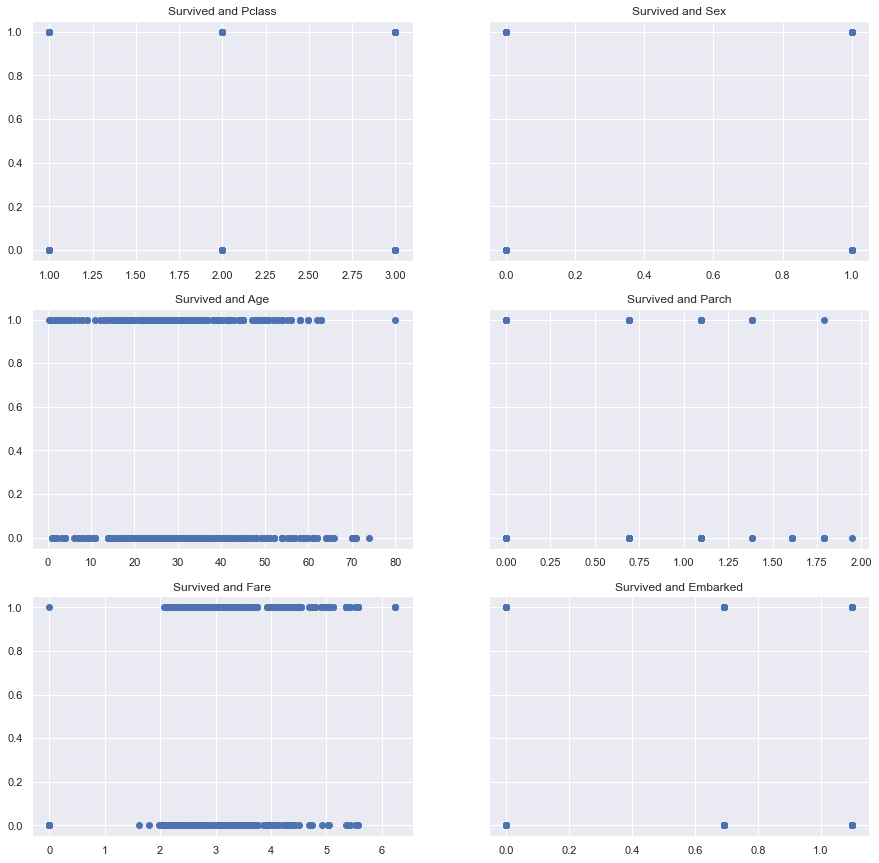

In [39]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2, sharey=True, figsize =(15,15)) # share survived as y
ax1.scatter(data_cleaned['Pclass'],data_cleaned['Survived'])
ax1.set_title('Survived and Pclass')
ax2.scatter(data_cleaned['Sex'],data_cleaned['Survived'])
ax2.set_title('Survived and Sex')
ax3.scatter(data_cleaned['Age'],data_cleaned['Survived'])
ax3.set_title('Survived and Age')
ax4.scatter(data_cleaned['Parch'],data_cleaned['Survived'])
ax4.set_title('Survived and Parch')
ax5.scatter(data_cleaned['Fare'],data_cleaned['Survived'])
ax5.set_title('Survived and Fare')
ax6.scatter(data_cleaned['Embarked'],data_cleaned['Survived'])
ax6.set_title('Survived and Embarked')

### Normalize the inputs

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 8.25208629e-01,  7.35342031e-01, -5.89619855e-01,
        -5.29822060e-01, -8.77590935e-01, -5.95544194e-01],
       [-1.57221121e+00, -1.35991138e+00,  6.44847987e-01,
        -5.29822060e-01,  1.36637963e+00,  1.22984173e+00],
       [ 8.25208629e-01, -1.35991138e+00, -2.81002895e-01,
        -5.29822060e-01, -7.96281271e-01, -5.95544194e-01],
       ...,
       [ 8.25208629e-01, -1.35991138e+00, -5.48213849e-16,
         2.13812299e+00,  2.45663007e-01, -5.95544194e-01],
       [-1.57221121e+00,  7.35342031e-01, -2.81002895e-01,
        -5.29822060e-01,  4.91068011e-01,  1.22984173e+00],
       [ 8.25208629e-01,  7.35342031e-01,  1.81922546e-01,
        -5.29822060e-01, -8.16755342e-01,  2.29762404e+00]])

### Split the data into train and test

In [41]:
from sklearn.model_selection import train_test_split

# I'll split 20% for test and 80% for train
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

# Build and Train the Model

In [42]:
def get_model_evaluation(true_value, prediction):
    # this model will return the evaluation based on the predicted and actual targets
    accuracy = sum(true_value==prediction)/(sum(true_value==prediction) + sum(true_value!=prediction))*100
    precision = abs(sum(prediction==0)-sum(prediction!=true_value))/(abs(sum(prediction==0)-sum(prediction!=true_value))+abs(sum(prediction==0)-sum(prediction==true_value)))
    recall = abs(sum(prediction==0)-sum(prediction!=true_value))/(abs(sum(prediction==0)-sum(prediction!=true_value))+abs(sum(prediction==1)-sum(prediction==true_value)))
    f1_measure = 2*precision*recall/(recall+precision)

    return f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-measure: {f1_measure}'

## Logistic Regression

In [43]:
# Create the model
reg_logistic = linear_model.LogisticRegression(C=10e10, random_state=1234)

# Fit the model
reg_logistic.fit(x_train,y_train)

LogisticRegression(C=100000000000.0, random_state=1234)

In [49]:
# Predict using the model
y_hat = reg_logistic.predict(x_test)
y_hat

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [50]:
y_test.shape

(178,)

# Results

In [51]:
# Get the weights
reg_logistic.coef_

array([[-0.91341264, -1.22351981, -0.44651605, -0.16395656,  0.06005394,
         0.24106284]])

In [52]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg_logistic.coef_[0]
reg_summary

,Features,Weights
0,Pclass,-0.913413
1,Sex,-1.223520
2,Age,-0.446516
3,Parch,-0.163957
4,Fare,0.060054
5,Embarked,0.241063


From the weights of each feature, I can observe that the higher the values of the attributes Pclass, Sex, Age, and Parch, the lower the chance of survivel. While, the higher the values of the Fare and Embarked attributes the higher the chance of survivel.

In [53]:
# get the evaluation of the model
print(f'Train Evaluation:\n{get_model_evaluation(y_train,reg_logistic.predict(x_train))}\n==================\nTest Evaluation:\n{get_model_evaluation(y_test,y_hat)}')

Train Evaluation:
Accuracy: 79.32489451476793
Precision: 0.7434052757793765
Recall: 0.5
F1-measure: 0.5978784956605593
Test Evaluation:
Accuracy: 82.58426966292134
Precision: 0.8017241379310345
Recall: 0.5
F1-measure: 0.6158940397350994


Since the test accuracy is higher than the train accuracy, I can affirm that there was no underfit nor overfit

#### Logistic Regression with cross validation

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# folds for K-fold cross-validation
k_fold = KFold(n_splits=5,random_state=0,shuffle=True)
# Create the model
model = linear_model.LogisticRegression(solver='liblinear')
results = cross_val_score(model,inputs_scaled,targets,cv=k_fold)
print(f'Accuracy: {results.mean()*100}%')

Accuracy: 79.19253475528471%


The accuracy is not much diferent from the one obtained previosly

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

# create the model and fit the data
decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
tree = decision_tree.predict(x_test)

In [55]:
print(f'Train Evaluation:\n{get_model_evaluation(y_train,decision_tree.predict(x_train))}\n==================\nTest Evaluation:\n{get_model_evaluation(y_test,tree)}')

Train Evaluation:
Occuracy: 98.17158931082982
Precision: 0.6364963503649635
Recall: 0.5
F1-measure: 0.5600513808606294
Test Evaluation:
Occuracy: 82.02247191011236
Precision: 0.8508771929824561
Recall: 0.5
F1-measure: 0.6298701298701299


This model performance in test is far lower than the one observed in train, which shows that this model overfit the data and will probably perform badly in production

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = 10
knn = KNeighborsClassifier(n_neighbors = num_neighbors)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
print(f'Train Accuracy: {knn.score(x_train, y_train)*100}\nTest Accuracy: {knn.score(x_test, y_test)*100}')

Train Occuracy: 82.27848101265823
Test Occuracy: 82.58426966292134


No overfit nor underfit, and the accuracy is acceptable

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

num_estimators = 50
random_forest = RandomForestClassifier(n_estimators=num_estimators)
random_forest.fit(x_train,y_train)
rf_prediction = random_forest.predict(x_test)
print(f'Train Accuracy: {random_forest.score(x_train, y_train)*100}\nTest Accuracy: {random_forest.score(x_test, y_test)*100}')

Train Occuracy: 98.17158931082982
Test Occuracy: 82.58426966292134


Another case of overfit

# Comments

There was no significant improvement compared to the original project notebook